In [1]:
# Import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading in the loan.csv
df = pd.read_csv(Path(r"Resources\loan Data SQL.csv"))
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,purpose,title,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,54734,25000,25000,19080.057200,36 months,0.1189,829.10,< 1 year,RENT,85000,...,debt_consolidation,Debt consolidation for on-time payer,19.48,0,0,10,0,28854,0.52,42
1,55742,7000,7000,672.803839,36 months,0.1071,228.22,< 1 year,RENT,65000,...,credit_card,Credit Card payoff,14.29,0,0,7,0,33623,0.77,7
2,57245,1200,1200,1200.000000,36 months,0.1311,40.50,10+ years,OWN,54000,...,debt_consolidation,zxcvb,5.47,0,0,5,0,2584,0.40,31
3,57416,10800,10800,10691.551050,36 months,0.1357,366.86,6 years,RENT,32000,...,debt_consolidation,Nicolechr1978,11.63,0,1,14,0,3511,0.26,40
4,58915,7500,5025,557.087228,36 months,0.1008,162.34,3 years,RENT,85000,...,debt_consolidation,sdguy,8.10,0,1,3,0,33667,0.73,11


In [3]:
# Cleaning data by dropping unnecessary columns
columns_to_drop = ['id']
df = df.drop(columns= columns_to_drop)

In [4]:
df = df.dropna()

In [5]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'title', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc'],
      dtype='object')

In [6]:
# Use get_dummies to allow string columns to be analyzed
df_dummies = pd.get_dummies(df, columns=['term', 'emp_length', 'home_ownership','verification_status', 'loan_status', 'purpose', 'title'])

In [7]:
# Separate into target (interest rate) and features
y = df_dummies["int_rate"]

X = df_dummies.drop(columns="int_rate")

In [8]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.5)

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
# Define the hyperparameters to run
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a Decision Tree regressor
dt = DecisionTreeRegressor()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# determine the optimum hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the optimal hyperparameters
best_dt = DecisionTreeRegressor(**best_params)
best_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mean Squared Error on Test Set: 0.0006439982760834155


In [11]:
# Using Descision Tree Model 
tree_model = DecisionTreeRegressor(max_depth=7, min_samples_leaf=1, min_samples_split=5)


In [12]:
# Fit and Predict the Decision Tree Model
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [13]:
# Determine Mean Squared Error of the model to show accuracy
ms_tree = mean_squared_error(y_test, y_pred_tree)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 0.0006439982760834155


In [14]:
feature_importances = pd.Series(tree_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

term_ 36 months                                                            0.363615
revol_util                                                                 0.336760
installment                                                                0.124268
delinq_2yrs                                                                0.051925
open_acc                                                                   0.029941
                                                                             ...   
title_Funches & Associates LLC                                             0.000000
title_Fun and Debt loan                                                    0.000000
title_Fun In The Snow                                                      0.000000
title_Fully Employed, just payin off card & trying to save on lame fees    0.000000
title_îîMY FIRST CAR îî                                            0.000000
Length: 19168, dtype: float64


In [15]:
# Convert to a DataFrame
feature_importances_df = pd.DataFrame({'Feature': feature_importances.index, 'Importance': feature_importances.values})
feature_importances_df.head(20)

,Feature,Importance
0,term_ 36 months,0.363615
1,revol_util,0.336760
2,installment,0.124268
3,delinq_2yrs,0.051925
4,open_acc,0.029941
5,inq_last_6mths,0.028456
6,funded_amnt,0.022302
7,revol_bal,0.020867
8,total_acc,0.009182
9,loan_amnt,0.006036


In [16]:
# Sort the DataFrame by 'Importance' in descending order
top_features = feature_importances_df.sort_values(by='Importance', ascending=False).head(8)
top_features

,Feature,Importance
0,term_ 36 months,0.363615
1,revol_util,0.336760
2,installment,0.124268
3,delinq_2yrs,0.051925
4,open_acc,0.029941
5,inq_last_6mths,0.028456
6,funded_amnt,0.022302
7,revol_bal,0.020867


In [25]:
# Rename Feature values
top_features['Feature'] = top_features['Feature'].replace({
    'term_ 36 months': 'Term Length',
    'revol_util': 'Credit Utilization Rate',
    'installment': 'Monthly Payment',
    'delinq_2yrs': 'Delinquencies (2 yrs)',
    'open_acc': 'Open Credit Lines',
    'inq_last_6mths': 'Credit Inquiry (6 mo)',
    'funded_amnt': 'Loan Amount',
    'revol_bal': 'Credit Revolving Balance'
})
top_features

,Feature,Importance
0,Term Length,0.363615
1,Credit Utilization Rate,0.336760
2,Monthly Payment,0.124268
3,Delinquencies (2 yrs),0.051925
4,Open Credit Lines,0.029941
5,Credit Inquiry (6 mo),0.028456
6,Loan Amount,0.022302
7,Credit Revolving Balance,0.020867


In [28]:
# Export the top features to a .json file for use in Plotly chart
top_features.to_json('project/data/feature_importances_data.json', orient='records', lines=False)

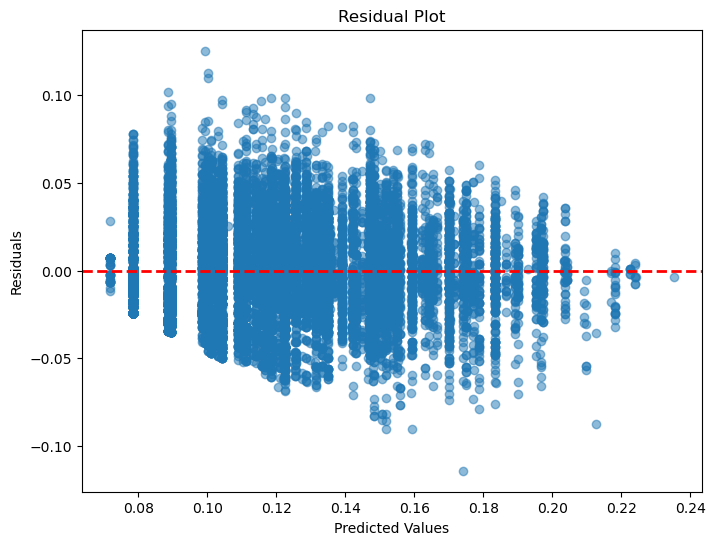

In [29]:
# Residual Plot
residuals = y_test - y_pred_tree
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_tree, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()